In [1]:
import os
%pwd

'c:\\Users\\hp\\Documents\\DS\\Complete Project\\03-Air-Quality-Index-Predictor\\research'

In [2]:
os.chdir("../")
%pwd

'c:\\Users\\hp\\Documents\\DS\\Complete Project\\03-Air-Quality-Index-Predictor'

<a id="1"></a>  
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">1. Import Libraries</p>

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_style("darkgrid") 


<a id="1"></a>  
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2. Reading and Understanding the Dataset</p>

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">2.1. Import Dataset</p>

In [4]:
df = pd.read_csv("artifacts/data_ingestion/data.csv")
df.head()

,id,date,city,specie,median
0,1,29-12-2014,New Delhi,pm25,394.0
1,2,29-12-2014,Hyderabad,pm25,161.0
2,3,29-12-2014,Delhi,pm10,218.0
3,4,29-12-2014,Delhi,o3,3.2
4,5,29-12-2014,Delhi,so2,4.2


<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">2.2. Discover Data</p>

In [5]:
# View dimensions of dataset   
rows, col = df.shape
print ("Dimensions of dataset: {}" . format (df.shape))
print ('Rows:', rows,'\nColumns:', col)

Dimensions of dataset: (516786, 5)
Rows: 516786 
Columns: 5


In [6]:
# Check of missing values
df.isna().sum()

id        0
date      0
city      0
specie    0
median    0
dtype: int64

In [7]:
# Number of uniqe elements in each columns
unique = df.nunique()
unique.to_frame().T

,id,date,city,specie,median
0,516786,3113,23,22,14958


In [8]:
# Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516786 entries, 0 to 516785
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      516786 non-null  int64  
 1   date    516786 non-null  object 
 2   city    516786 non-null  object 
 3   specie  516786 non-null  object 
 4   median  516786 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 19.7+ MB


**The date column is an object so we have to convert it into date format**

In [9]:
# Check Statistics of Data
df.describe()

,id,median
count,516786.000000,516786.000000
mean,258393.500000,96.296482
std,149183.412444,233.363894
min,1.000000,-56.800000
25%,129197.250000,5.600000
50%,258393.500000,18.500000
75%,387589.750000,62.700000
max,516786.000000,1024.000000


<a id="1"></a>  
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3. Data Preprocessing</p>

## 1. Specie Column

In [10]:
df['specie'].sample(20)

307063             o3
332350    temperature
423038             o3
217748            no2
381499            dew
463062             co
495983             o3
379953             o3
356716           pm10
345549    temperature
471378       pressure
462965           pm10
242103            dew
410089       humidity
455492       humidity
72521             SO2
131568       humidity
21102            pm25
301282       humidity
81294              O3
Name: specie, dtype: object

In [11]:
print("Total unique values in specie columns ",df['specie'].value_counts().shape[0])
df['specie'].value_counts()

Total unique values in specie columns  22


specie
pm25             47130
so2              44275
co               44254
no2              44038
o3               43648
pm10             39510
temperature      38891
humidity         38524
dew              38252
wind-speed       36556
pressure         36526
O3                8925
SO2               8925
CO                8925
NO2               8925
PM10              8925
PM2.5             8925
wind-gust         7324
wind speed        1931
wd                1750
precipitation      456
wind gust          171
Name: count, dtype: int64

<div style="background-color: black; padding:20px; font-size:20px">
As we can see that some categories value are in lower case while some in upper case representing the same value , so we are going to change their format into same format to avoid confusion

In [12]:
df['specie'] = df['specie'].str.lower()
df['specie'].replace(to_replace= dict( pm25 = "pm2.5" ), inplace=True)
print("Total unique values in specie columns ",df['specie'].value_counts().shape[0])
df['specie'].value_counts()

Total unique values in specie columns  16


specie
pm2.5            56055
so2              53200
co               53179
no2              52963
o3               52573
pm10             48435
temperature      38891
humidity         38524
dew              38252
wind-speed       36556
pressure         36526
wind-gust         7324
wind speed        1931
wd                1750
precipitation      456
wind gust          171
Name: count, dtype: int64

<div style="background-color: black; padding:20px; font-size:20px">
The categories of the species column are the air pollutants that effect the air quality <p>
Now place of repeating every row for each category it would be better to convert it into columns.

In [13]:
pivot_df = df.pivot_table(index=['date','city'], columns='specie', values='median')

pivot_df

specie                           co   dew  humidity   no2   o3   pm10  pm2.5  \
date       city                                                                
01-01-2015 Bengaluru            NaN   NaN       NaN   4.6  NaN    NaN    NaN   
           Chennai             10.9   NaN       NaN   5.5  1.6   29.0  153.0   
           Delhi               20.8   NaN       NaN  66.5  5.2  230.0  382.0   
           Kolkata              NaN   NaN       NaN   NaN  NaN    NaN  239.0   
           Lucknow             18.5   NaN       NaN   1.0  NaN  188.0    NaN   
...                             ...   ...       ...   ...  ...    ...    ...   
31-12-2022 Patna               22.8  12.0      83.4   9.7  6.3  327.0  291.0   
           Shillong             5.2  15.0      83.2   1.2  0.7   76.0  167.0   
           Thiruvananthapuram   8.5  23.0      48.0   2.9  5.9   45.0   88.0   
           Thrissur            13.4  21.0      76.0  16.0  0.7   54.0  132.0   
           Visakhapatnam        3.6  22.5      80.0  13.7  5.8   77.0  155.0   

specie                         precipitation  pressure   so2  temperature  wd  \
date       city                                                                 
01-01-2015 Bengaluru                     NaN       NaN   NaN          NaN NaN   
           Chennai                       NaN       NaN   3.9          NaN NaN   
           Delhi                         NaN       NaN   9.9          NaN NaN   
           Kolkata                       NaN       NaN   NaN          NaN NaN   
           Lucknow                       NaN       NaN   3.5          NaN NaN   
...                                      ...       ...   ...          ...  ..   
31-12-2022 Patna                         NaN    1017.0   6.5         14.5 NaN   
           Shillong                      NaN    1017.0   7.7         15.5 NaN   
           Thiruvananthapuram            NaN    1015.0   3.1         28.0 NaN   
           Thrissur                      NaN    1015.0  12.4         26.0 NaN   
           Visakhapatnam                 NaN    1016.0   4.7         24.0 NaN   

specie                         wind gust  wind speed  wind-gust  wind-speed  
date       city                                                              
01-01-2015 Bengaluru                 NaN         NaN        NaN         NaN  
           Chennai                   NaN         NaN        NaN         NaN  
           Delhi                     NaN         NaN        NaN         NaN  
           Kolkata                   NaN         NaN        NaN         NaN  
           Lucknow                   NaN         NaN        NaN         NaN  
...                                  ...         ...        ...         ...  
31-12-2022 Patna                     NaN         NaN        NaN         0.2  
           Shillong                  NaN         NaN        NaN         1.6  
           Thiruvananthapuram        NaN         NaN        NaN         0.3  
           Thrissur                  NaN         NaN        NaN         1.2  
           Visakhapatnam             NaN         NaN        NaN         0.3  

[52260 rows x 16 columns]

<div style="background-color: black; padding:20px; font-size:20px">
Now we can easily see the concentration of all the pollutant for a paticular date easily

In [14]:
pivot_df.columns.name = None
pivot_df.index.name = "Index"
pivot_df.reset_index(inplace=True)
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52260 entries, 0 to 52259
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           52260 non-null  object 
 1   city           52260 non-null  object 
 2   co             48655 non-null  float64
 3   dew            36114 non-null  float64
 4   humidity       36420 non-null  float64
 5   no2            48457 non-null  float64
 6   o3             48072 non-null  float64
 7   pm10           44544 non-null  float64
 8   pm2.5          51425 non-null  float64
 9   precipitation  429 non-null    float64
 10  pressure       34516 non-null  float64
 11  so2            48684 non-null  float64
 12  temperature    36760 non-null  float64
 13  wd             1657 non-null   float64
 14  wind gust      164 non-null    float64
 15  wind speed     1813 non-null   float64
 16  wind-gust      6895 non-null   float64
 17  wind-speed     34460 non-null  float64
dtypes: flo

In [15]:
pivot_df.isnull().sum()/len(pivot_df)*100

date              0.000000
city              0.000000
co                6.898201
dew              30.895522
humidity         30.309989
no2               7.277076
o3                8.013777
pm10             14.764638
pm2.5             1.597780
precipitation    99.179104
pressure         33.953310
so2               6.842710
temperature      29.659395
wd               96.829315
wind gust        99.686184
wind speed       96.530808
wind-gust        86.806353
wind-speed       34.060467
dtype: float64

<div style="background-color: black; padding:20px; font-size:20px">
As we can see that the columsn like wind-gust,wind speed,wind gust, wd , precipitation have very less values and mostly are empty , therefore they would be no use for us<p>


In [16]:
pivot_df.drop(['precipitation','wd','wind-gust','wind speed','wind gust'],inplace=True,axis =1)
pivot_df.sample(10)

,date,city,co,dew,humidity,no2,o3,pm10,pm2.5,pressure,so2,temperature,wind-speed
32441,19-12-2018,Hyderabad,0.47,NaN,NaN,33.97,23.73,62.25,32.77,NaN,9.120,NaN,NaN
41980,25-07-2017,Delhi,0.00,NaN,NaN,18.10,0.00,0.00,22.17,NaN,0.000,NaN,NaN
4851,03-10-2017,Patna,0.27,NaN,NaN,20.42,1.90,0.00,24.27,NaN,3.500,NaN,NaN
36254,22-03-2017,Chennai,6.00,NaN,NaN,4.40,7.00,NaN,100.00,NaN,1.600,NaN,NaN
11631,07-09-2021,Hyderabad,3.00,22.0,89.5,7.80,3.20,9.00,34.00,705.0,2.400,27.8,1.0
14198,09-04-2015,Delhi,7.70,NaN,NaN,20.70,14.30,106.00,153.00,NaN,5.300,NaN,NaN
21859,13-09-2019,Lucknow,6.19,26.0,95.0,13.26,15.57,0.00,46.73,994.7,3.705,27.0,0.3
25347,15-09-2023,Lucknow,7.00,26.0,74.0,6.90,10.70,47.00,72.00,1003.0,3.500,30.0,0.5
22465,14-01-2023,Hāpur,10.20,10.5,81.2,16.00,5.70,150.00,195.00,1016.5,5.700,12.0,3.4
8797,06-02-2016,Delhi,5.10,NaN,NaN,31.90,5.30,303.00,248.00,NaN,9.000,NaN,NaN


## 2. Date Column

In [17]:
pivot_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52260 entries, 0 to 52259
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         52260 non-null  object 
 1   city         52260 non-null  object 
 2   co           48655 non-null  float64
 3   dew          36114 non-null  float64
 4   humidity     36420 non-null  float64
 5   no2          48457 non-null  float64
 6   o3           48072 non-null  float64
 7   pm10         44544 non-null  float64
 8   pm2.5        51425 non-null  float64
 9   pressure     34516 non-null  float64
 10  so2          48684 non-null  float64
 11  temperature  36760 non-null  float64
 12  wind-speed   34460 non-null  float64
dtypes: float64(11), object(2)
memory usage: 5.2+ MB


<div style="background-color: black; padding:20px; font-size:20px">
As we can see that the  date column is object dtype so we have to convert it into date dtype 

In [18]:
pivot_df['date'].sample(10) 

21836    13-09-2017
15577    10-01-2020
13989    09-02-2019
14247    09-04-2019
11651    07-09-2022
44737    27-02-2021
47676    28-10-2022
43761    26-07-2021
47466    28-09-2019
32838    20-03-2017
Name: date, dtype: object

<div style="background-color: black; padding:20px; font-size:20px">
It seems so that the date is arranged in day-month-year format

In [19]:
pivot_df['date'] = pd.to_datetime(pivot_df['date'],format = "%d-%m-%Y")
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52260 entries, 0 to 52259
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         52260 non-null  datetime64[ns]
 1   city         52260 non-null  object        
 2   co           48655 non-null  float64       
 3   dew          36114 non-null  float64       
 4   humidity     36420 non-null  float64       
 5   no2          48457 non-null  float64       
 6   o3           48072 non-null  float64       
 7   pm10         44544 non-null  float64       
 8   pm2.5        51425 non-null  float64       
 9   pressure     34516 non-null  float64       
 10  so2          48684 non-null  float64       
 11  temperature  36760 non-null  float64       
 12  wind-speed   34460 non-null  float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 5.2+ MB


In [20]:
pivot_df = pivot_df[pivot_df['date'].dt.year != 2014]

## 3. City column

In [21]:
print("Total number of cities are ",pivot_df['city'].nunique() )
pivot_df['city'].value_counts()

Total number of cities are  23


city
Delhi                 3110
Chennai               3110
Mumbai                3105
Hyderabad             3085
Bengaluru             3074
Lucknow               3064
Patna                 2919
Kolkata               2571
Jaipur                2514
Visakhapatnam         2482
New Delhi             2337
Thiruvananthapuram    2189
Chandigarh            2057
Nashik                2009
Gandhinagar           1973
Bhopal                1739
Nagpur                1724
Ghāziābād             1649
Hāpur                 1644
Muzaffarnagar         1628
Shillong              1486
Thrissur              1470
Mysore                1294
Name: count, dtype: int64

In [22]:
pivot_df['city'].replace(to_replace= dict( Hāpur = "Hapur", Ghāziābād = "Ghaziabad" ), inplace=True)
pivot_df['city'].unique()

array(['Bengaluru', 'Chennai', 'Delhi', 'Kolkata', 'Lucknow', 'Mumbai',
       'New Delhi', 'Chandigarh', 'Jaipur', 'Gandhinagar', 'Hyderabad',
       'Nagpur', 'Nashik', 'Patna', 'Visakhapatnam', 'Thiruvananthapuram',
       'Bhopal', 'Ghaziabad', 'Hapur', 'Muzaffarnagar', 'Mysore',
       'Shillong', 'Thrissur'], dtype=object)

## 4. Fixing names

In [23]:
pivot_df.columns

Index(['date', 'city', 'co', 'dew', 'humidity', 'no2', 'o3', 'pm10', 'pm2.5',
       'pressure', 'so2', 'temperature', 'wind-speed'],
      dtype='object')

In [24]:
pivot_df.rename(columns = {'co':'CO','no2':'NO2','o3':'O3','pm10':'PM10','pm2.5':'PM2.5','so2':'SO2'}, inplace = True) 
pivot_df.columns

Index(['date', 'city', 'CO', 'dew', 'humidity', 'NO2', 'O3', 'PM10', 'PM2.5',
       'pressure', 'SO2', 'temperature', 'wind-speed'],
      dtype='object')

## 5. Calculating AQI

<div style="background-color: black; padding:20px; font-size:20px">
Now we have some proper values of the major contributer of the air pollution <p>
We will we consider the columns CO , NO2, O3, PM10, PM2.5 ,SO2<p>
We will we now finding the AQI acording to the standard formula


In [25]:
new_df = pivot_df

In [26]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0


## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

### CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

new_df["PM2.5_SubIndex"] = new_df["PM2.5"].apply(lambda x: get_PM25_subindex(x))

new_df["PM10_SubIndex"] = new_df["PM10"].apply(lambda x: get_PM10_subindex(x))

new_df["O3_SubIndex"] = new_df["O3"].apply(lambda x: get_O3_subindex(x))

new_df["CO_SubIndex"] = new_df["CO"].apply(lambda x: get_CO_subindex(x))

new_df["NOx_SubIndex"] = new_df["NO2"].apply(lambda x: get_NOx_subindex(x))

new_df["SO2_SubIndex"] = new_df["SO2"].apply(lambda x: get_SO2_subindex(x))


In [27]:
new_df.head()

,date,city,CO,dew,humidity,NO2,O3,PM10,PM2.5,pressure,SO2,temperature,wind-speed,PM2.5_SubIndex,PM10_SubIndex,O3_SubIndex,CO_SubIndex,NOx_SubIndex,SO2_SubIndex
0,2015-01-01,Bengaluru,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000,5.750,0.000
1,2015-01-01,Chennai,10.9,NaN,NaN,5.5,1.6,29.0,153.0,NaN,3.9,NaN,NaN,325.384615,29.000000,1.6,212.857143,6.875,4.875
2,2015-01-01,Delhi,20.8,NaN,NaN,66.5,5.2,230.0,382.0,NaN,9.9,NaN,NaN,501.538462,186.666667,5.2,322.352941,83.125,12.375
3,2015-01-01,Kolkata,NaN,NaN,NaN,NaN,NaN,NaN,239.0,NaN,NaN,NaN,NaN,391.538462,0.000000,0.0,0.000000,0.000,0.000
4,2015-01-01,Lucknow,18.5,NaN,NaN,1.0,NaN,188.0,NaN,NaN,3.5,NaN,NaN,0.000000,158.666667,0.0,308.823529,1.250,4.375


In [28]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

# We are adding a Checks column which will tell us how many pollutants we have condidered 
# for the calculation of the AQI in case if some are null
new_df["Checks"] = (new_df["PM2.5_SubIndex"] > 0).astype(int) + \
                (new_df["PM10_SubIndex"] > 0).astype(int) + \
                (new_df["SO2_SubIndex"] > 0).astype(int) + \
                (new_df["NOx_SubIndex"] > 0).astype(int) + \
                (new_df["CO_SubIndex"] > 0).astype(int) + \
                (new_df["O3_SubIndex"] > 0).astype(int)

# The Aqi value is going to the value of the highest air pollutant
new_df["AQI_calculated"] = round(new_df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                  "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
new_df.loc[new_df["PM2.5_SubIndex"] + new_df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
new_df.loc[new_df.Checks < 3, "AQI_calculated"] = np.NaN

new_df["AQI_bucket_calculated"] = new_df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
new_df[~new_df.AQI_calculated.isna()].head(13)


,date,city,CO,dew,humidity,NO2,O3,PM10,PM2.5,pressure,...,wind-speed,PM2.5_SubIndex,PM10_SubIndex,O3_SubIndex,CO_SubIndex,NOx_SubIndex,SO2_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
1,2015-01-01,Chennai,10.9,NaN,NaN,5.5,1.6,29.0,153.0,NaN,...,NaN,325.384615,29.000000,1.6,212.857143,6.875,4.875,6,325.0,Very Poor
2,2015-01-01,Delhi,20.8,NaN,NaN,66.5,5.2,230.0,382.0,NaN,...,NaN,501.538462,186.666667,5.2,322.352941,83.125,12.375,6,502.0,Severe
4,2015-01-01,Lucknow,18.5,NaN,NaN,1.0,NaN,188.0,NaN,NaN,...,NaN,0.000000,158.666667,0.0,308.823529,1.250,4.375,4,309.0,Very Poor
7,2016-01-01,Chandigarh,6.2,NaN,NaN,12.5,4.1,NaN,151.0,NaN,...,NaN,323.846154,0.000000,4.1,152.500000,15.625,15.750,5,324.0,Very Poor
8,2016-01-01,Chennai,6.4,NaN,NaN,18.0,7.8,NaN,159.0,NaN,...,NaN,330.000000,0.000000,7.8,155.000000,22.500,0.625,5,330.0,Very Poor
10,2016-01-01,Jaipur,3.1,NaN,NaN,20.5,4.5,126.0,184.0,NaN,...,NaN,349.230769,117.333333,4.5,113.750000,25.625,6.125,6,349.0,Very Poor
11,2017-01-01,Bengaluru,9.2,NaN,NaN,12.5,18.3,68.0,100.0,NaN,...,NaN,233.333333,68.000000,18.3,190.000000,15.625,2.125,6,233.0,Poor
13,2017-01-01,Chennai,3.8,NaN,NaN,7.7,8.2,NaN,108.0,NaN,...,NaN,260.000000,0.000000,8.2,122.500000,9.625,3.625,5,260.0,Poor
14,2017-01-01,Delhi,19.0,NaN,NaN,21.3,4.5,164.0,251.0,NaN,...,NaN,400.769231,142.666667,4.5,311.764706,26.625,7.125,6,401.0,Severe
15,2017-01-01,Gandhinagar,12.6,NaN,NaN,34.4,7.6,NaN,182.0,NaN,...,NaN,347.692308,0.000000,7.6,237.142857,43.000,23.750,5,348.0,Very Poor


<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">5. Exploratory Data Analysis (EDA)</p>

## 5.1 Visualizing the missing values

In [29]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(new_df)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 22 columns.
There are 13 columns that have missing values.


,Missing Values,% of Total Values
wind-speed,17773,34.000000
pressure,17717,33.900000
dew,16119,30.900000
humidity,15813,30.300000
temperature,15473,29.600000
PM10,7697,14.700000
AQI_calculated,4659,8.900000
AQI_bucket_calculated,4659,8.900000
O3,4169,8.000000
NO2,3791,7.300000


## 5.2 Visualizing the pollutants

In [30]:
new_df['Particulate_Matter'] = new_df['PM2.5'] + new_df['PM10']
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3']

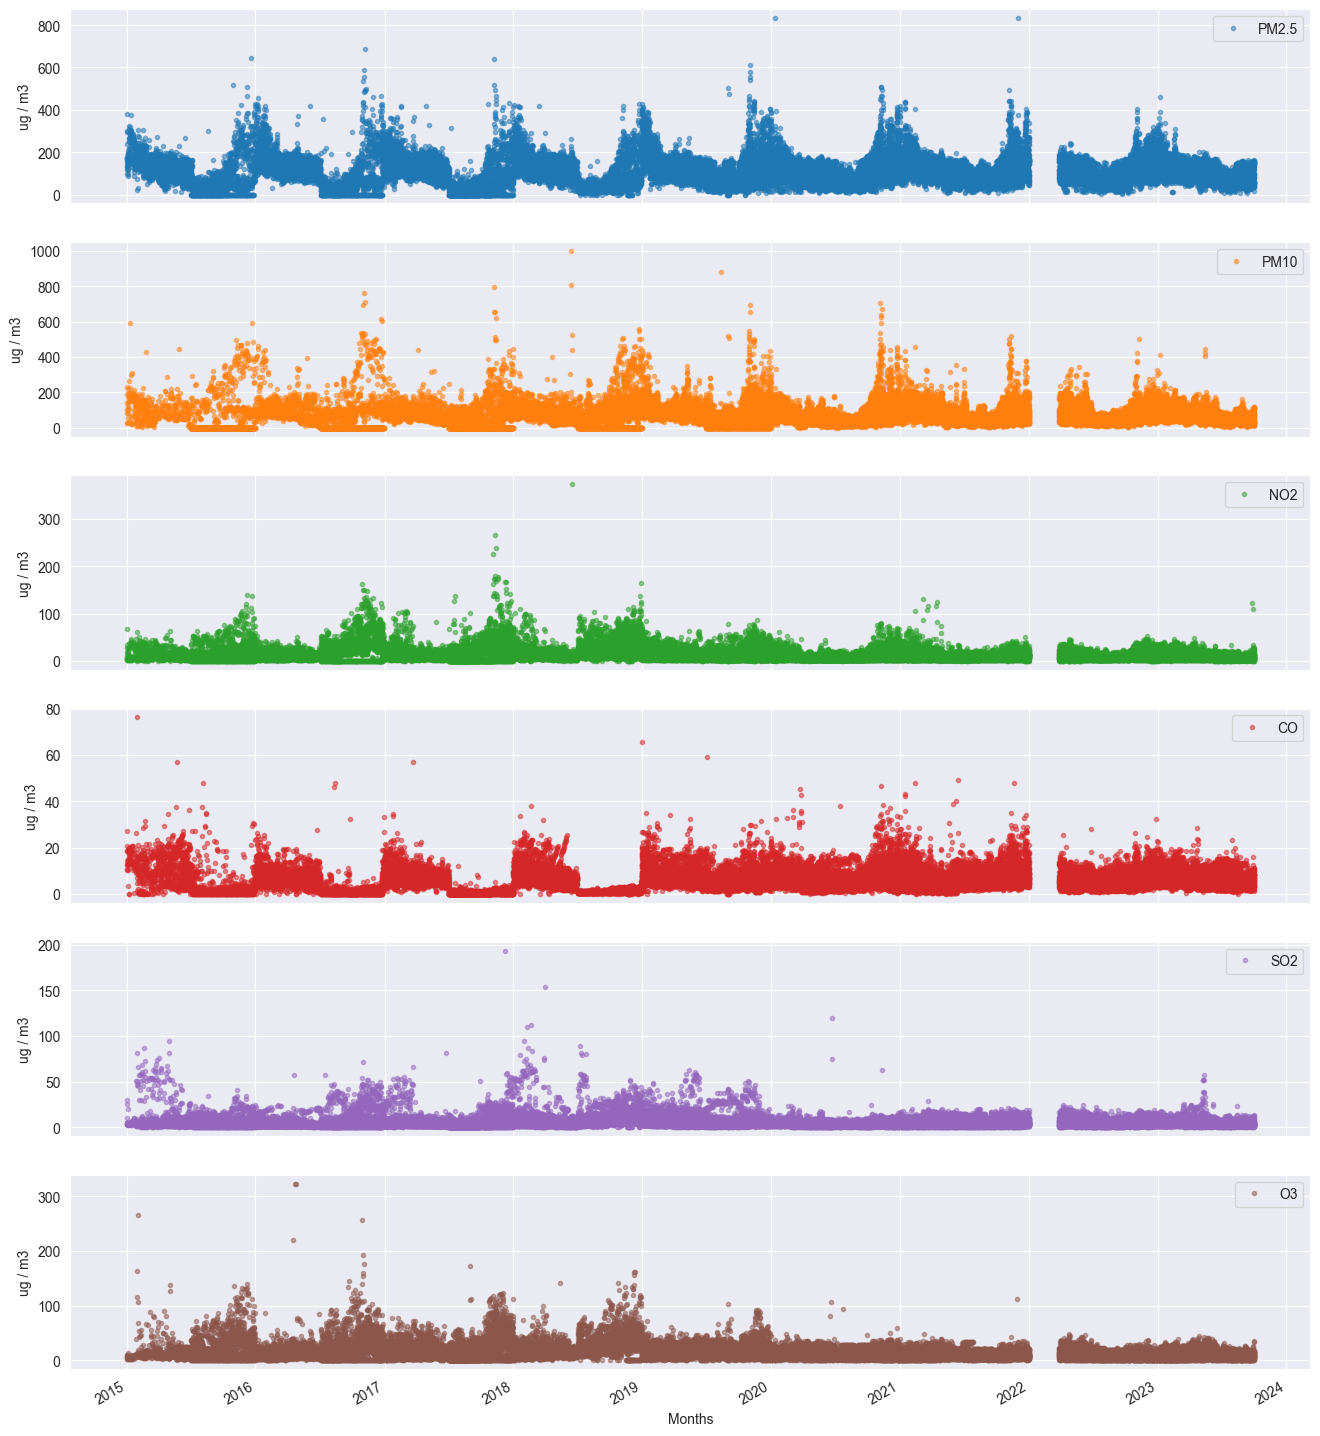

In [31]:
copy_df = new_df.copy()
copy_df.set_index('date',inplace=True)
axes = copy_df[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Months')
    ax.set_ylabel('ug / m3')

PM2.5 and PM10 pollution show a seasonal effect, with pollution being higher in winter months as compared to the summer ones.

## 5.3 Visulaizing the trends in air pollutants 

In [32]:
def trend_plot(df,values):
    
    # Prepare data df['date'].dt.year
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.strftime('%b')
    years = df['year'].unique()
    for value in values:
    # Draw Plot
        fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
        sns.boxplot(x='year', y=value, data=df, ax=axes[0])
        sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2023]), :])

        # Set Title
        axes[0].set_title(f'2023 Box Plot of {value}', fontsize=18); 
        axes[1].set_title(f'Month-wise Plot of {value} \n(The Seasonality)', fontsize=18)
        plt.show()

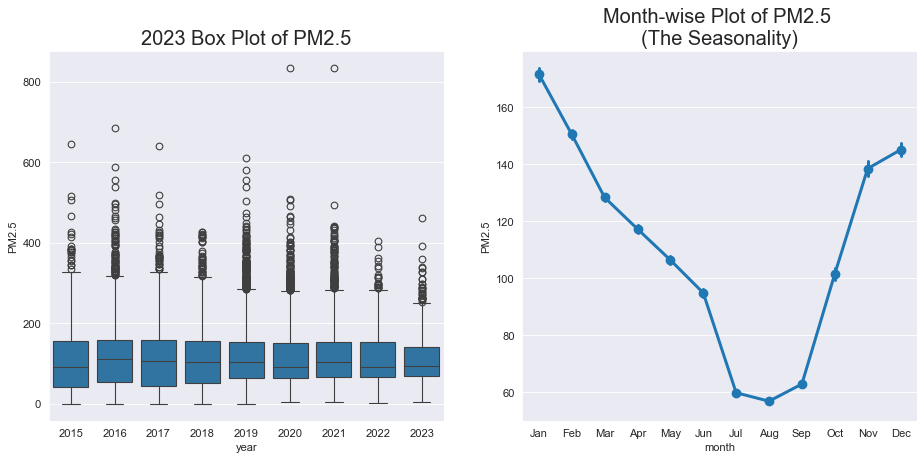

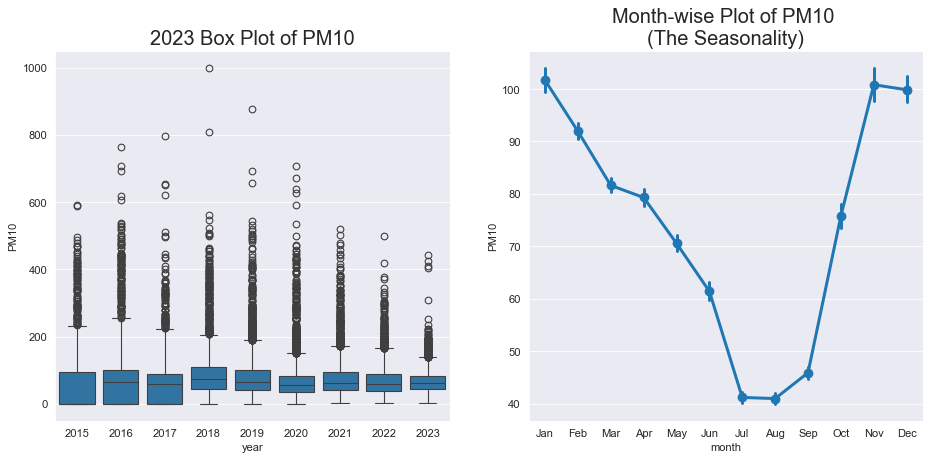

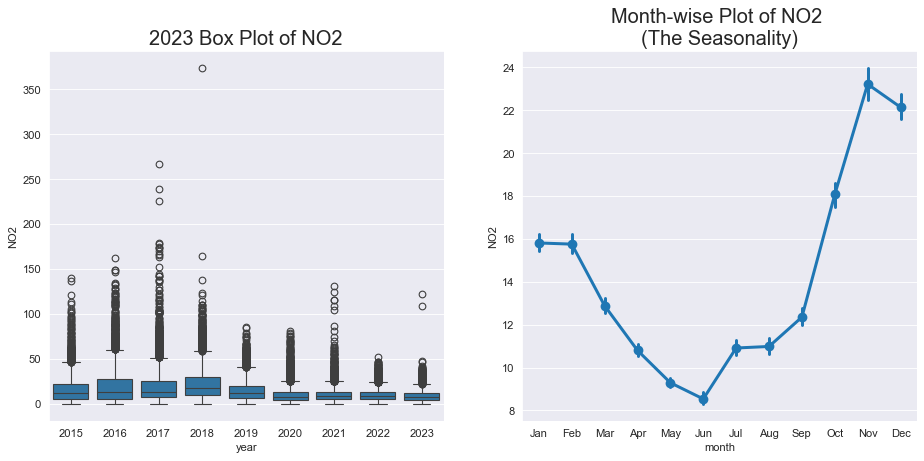

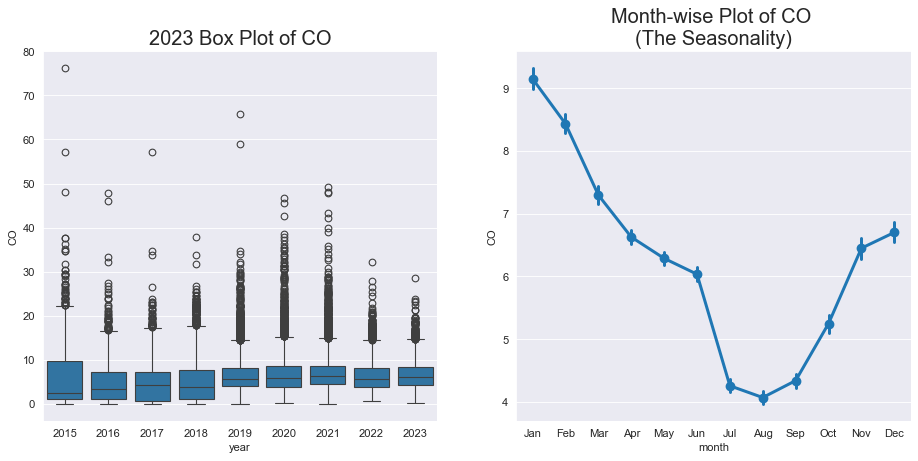

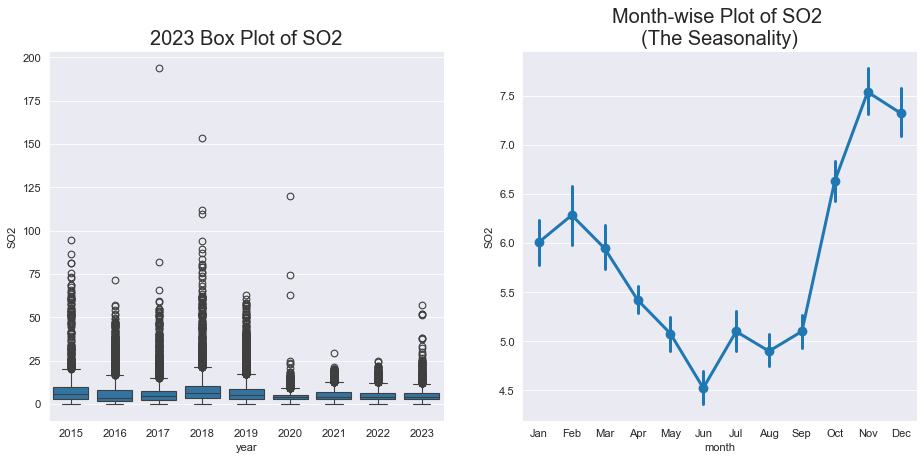

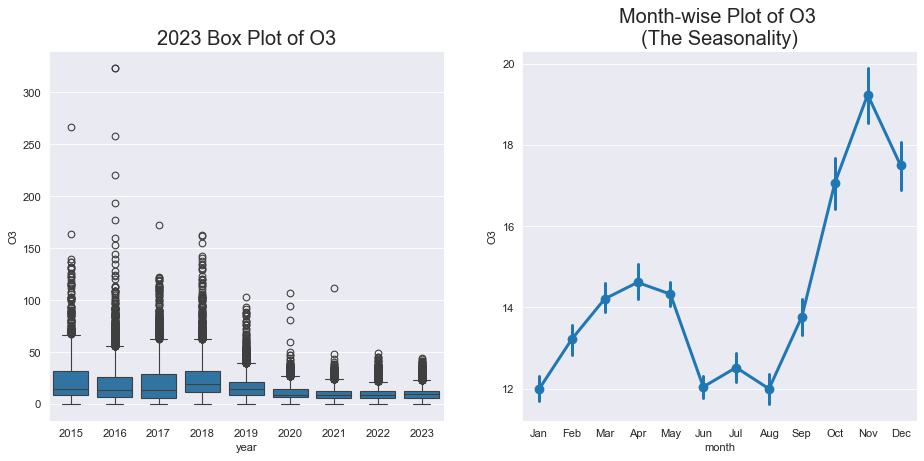

In [33]:

copy_df = new_df.copy()
values=['PM2.5','PM10','NO2', 'CO', 'SO2','O3']
trend_plot(copy_df,values)


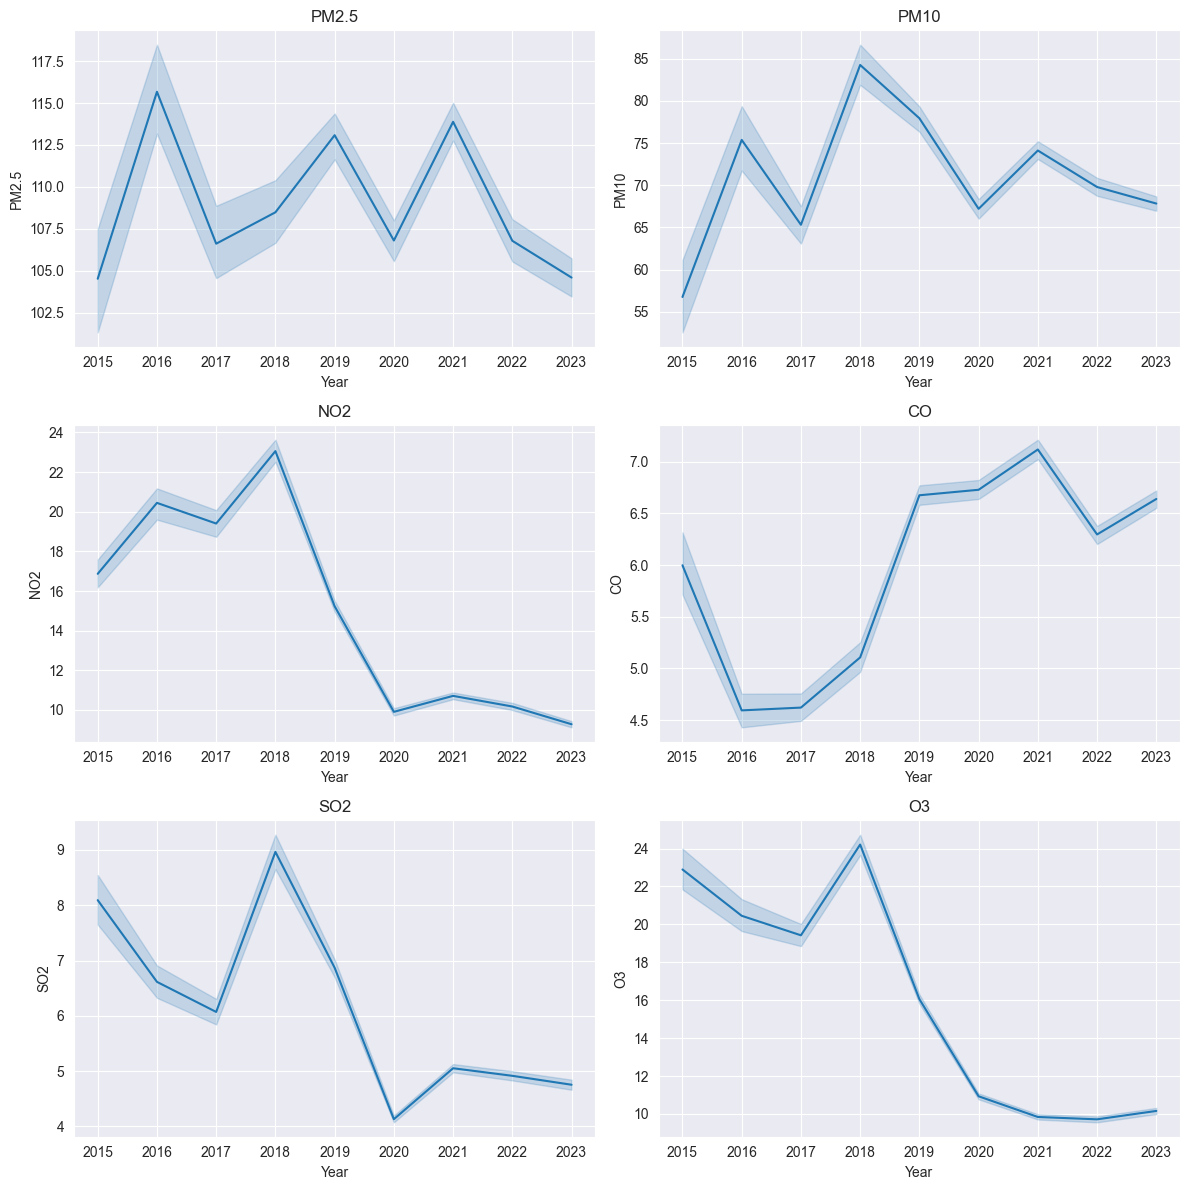

In [34]:
# Line plot analysis for amount of particulate matter and gases  over the years

copy_df = new_df.copy()
copy_df['Month'] = copy_df['date'].dt.month.astype(str)
copy_df['Year'] = copy_df['date'].dt.year.astype(str)

plt.figure(figsize=(12, 12))

for i, col in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.lineplot(data=copy_df, x='Year', y=col)
    plt.title(col)

plt.tight_layout()
plt.show()


## 5.4 Distribuiton of various gases and particulate in air

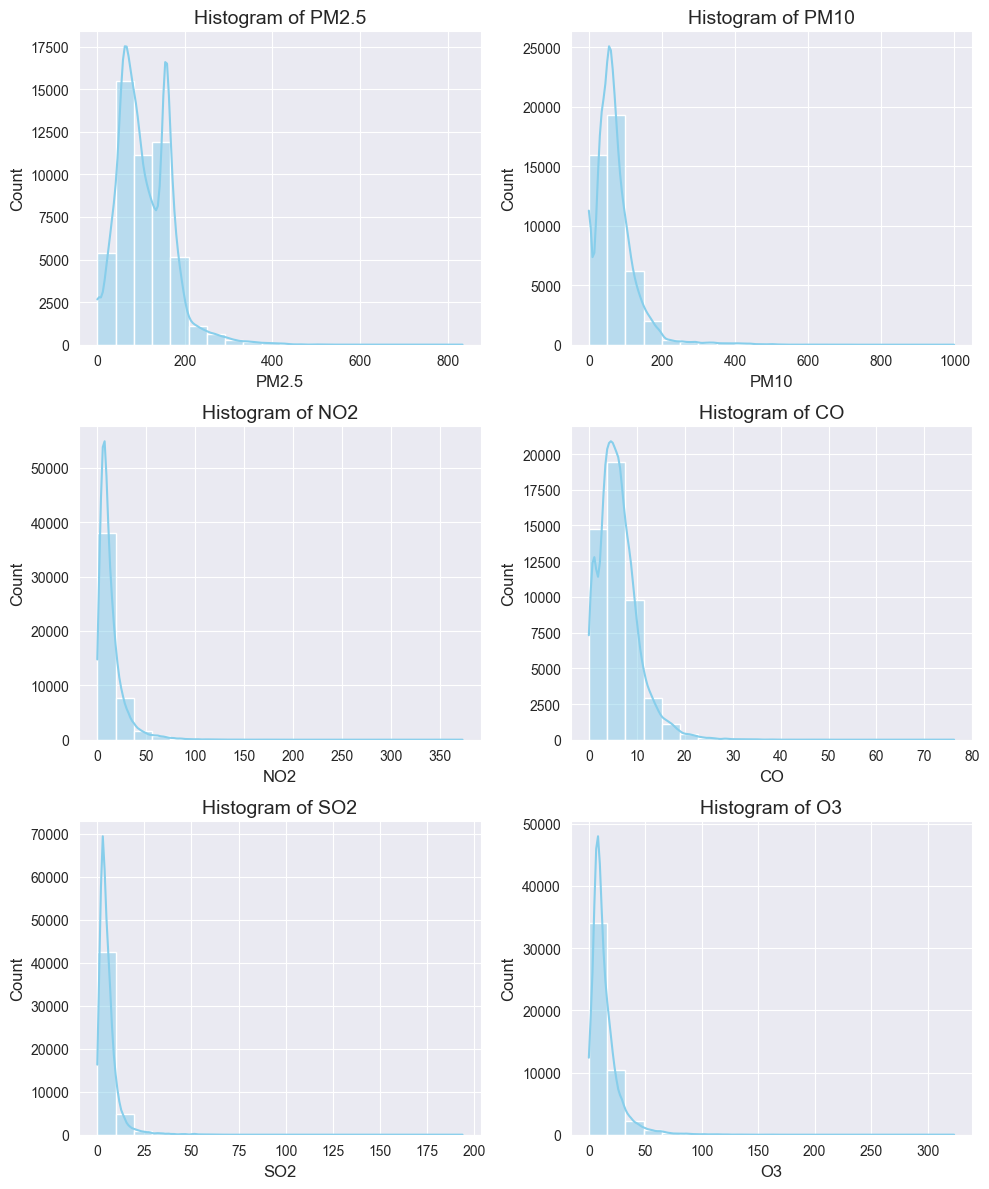

In [36]:

plt.figure(figsize=(10, 12))

for i, col in enumerate(pollutants, start=1):
    plt.subplot(3, 2, i)
    sns.histplot(copy_df[col].dropna(), bins=20, kde=True, color='skyblue', edgecolor='white')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Histogram of {col}', fontsize=14)

plt.tight_layout()
plt.show()

## 5.4 Visulaizing the most polluted city within India in terms of air pollution

In [37]:

def max_polluted_city(pollutant):
    x1 = copy_df[[pollutant,'city']].groupby(["city"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

from IPython.display import display_html

def display_side_by_side(*args):
    html_str = ''.join([copy_df.to_html() + '&nbsp;&nbsp;&nbsp;' for copy_df in args])
    display_html(html_str.replace('table', 'table style="display:inline"'), raw=True)

pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
o3 = max_polluted_city('O3')

display_side_by_side(pm2_5,pm10,no2,so2,co,o3)

,city,PM2.5
0,New Delhi,158.800000
1,Delhi,153.310000
2,Ghaziabad,150.990000
3,Muzaffarnagar,146.090000
4,Lucknow,142.050000
5,Patna,135.920000
6,Hapur,133.090000
7,Gandhinagar,120.290000
8,Chandigarh,117.020000
9,Kolkata,116.470000



## Let's also look at the above data visually to get a better perspective

In [38]:
copy_df = new_df.copy()

x1= copy_df[['PM2.5','city']].groupby(["city"]).median().sort_values(by='PM2.5',ascending=False).reset_index()
x2 = copy_df[['PM10','city']].groupby(["city"]).median().sort_values(by='PM10',ascending=False).reset_index()
x3= copy_df[['CO','city']].groupby(["city"]).median().sort_values(by='CO',ascending=False).reset_index()
x4 = copy_df[['NO2','city']].groupby(["city"]).median().sort_values(by='NO2',ascending=False).reset_index()
x5 = copy_df[['SO2','city']].groupby(["city"]).median().sort_values(by='SO2',ascending=False).reset_index()
x6 = copy_df[['O3','city']].groupby(["city"]).median().sort_values(by='O3',ascending=False).reset_index()
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=6, cols=1,vertical_spacing=0.1,
    subplot_titles=("PM2.5","PM10","CO","NO2","SO2","O3"))

fig.add_trace(go.Bar( y=x1['PM2.5'], x=x1["city"],  
                     marker=dict(color=x1['PM2.5'], coloraxis="coloraxis")),
              1, 1)


fig.add_trace(go.Bar( y=x2['PM10'], x=x2["city"],  
                     marker=dict(color=x2['PM10'], coloraxis="coloraxis")),
              2, 1)

fig.add_trace(go.Bar( y=x3['CO'], x=x3["city"],  
                     marker=dict(color=x3['CO'], coloraxis="coloraxis")),
              3, 1)


fig.add_trace(go.Bar( y=x4['NO2'], x=x4["city"],  
                     marker=dict(color=x4['NO2'], coloraxis="coloraxis")),
              4, 1)

fig.add_trace(go.Bar( y=x5['SO2'], x=x5["city"],  
                     marker=dict(color=x5['SO2'], coloraxis="coloraxis")),
              5, 1)

fig.add_trace(go.Bar( y=x6['O3'], x=x6["city"],  
                     marker=dict(color=x6['O3'], coloraxis="coloraxis")),
              6, 1)

fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white',height=2500 )
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="Cities")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)
fig.update_yaxes(title_text="ug / m3", row=2, col=1)
fig.update_yaxes(title_text="ug / m3", row=3, col=1)
fig.update_yaxes(title_text="ug / m3", row=4, col=1)
fig.update_yaxes(title_text="ug / m3", row=5, col=1)
fig.update_yaxes(title_text="ug / m3", row=6, col=1)
fig.show()

## 5.5 Plotting the average AQI over the years for major cities which have AQI greater than 500

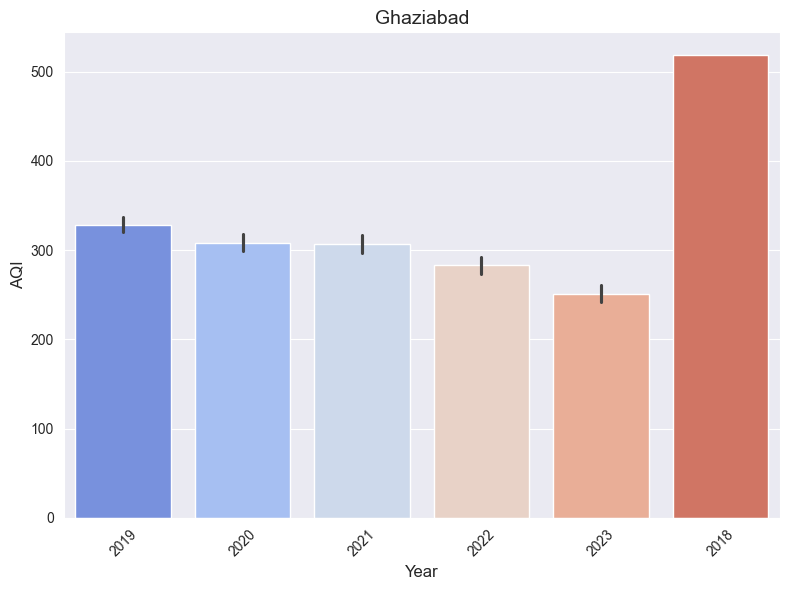

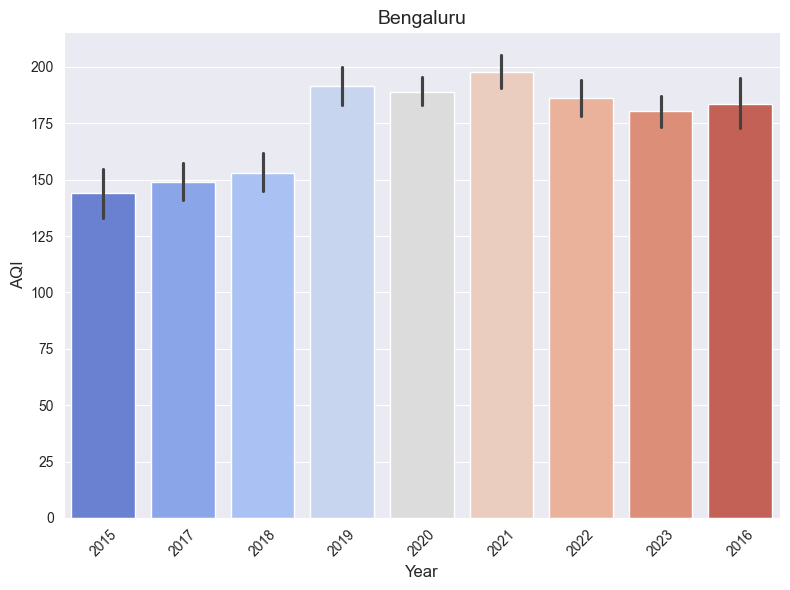

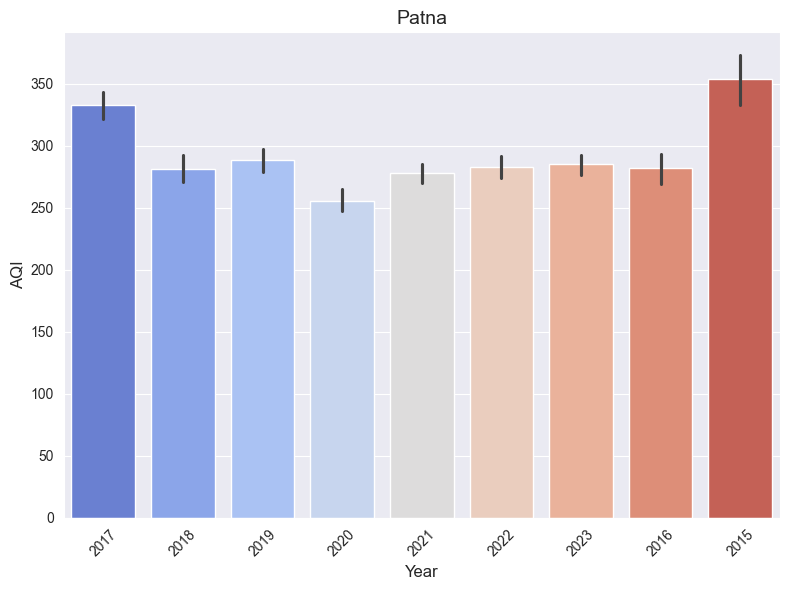

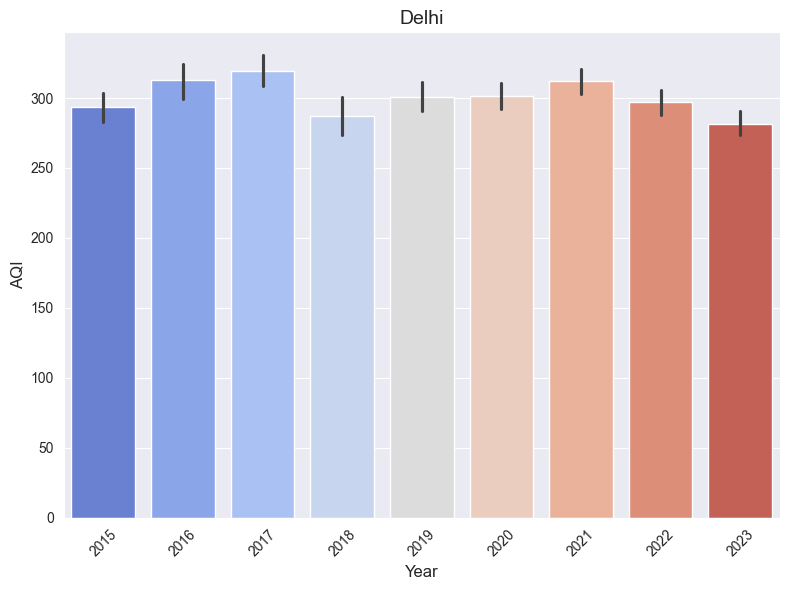

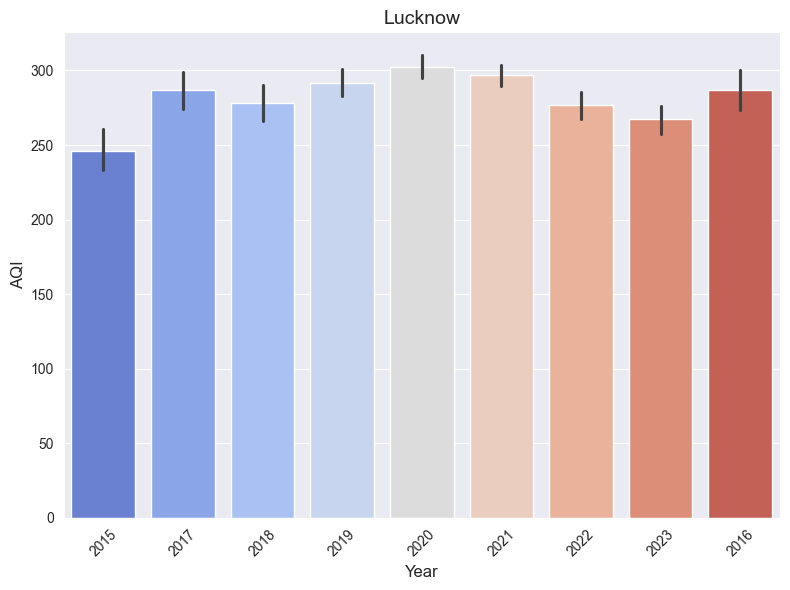

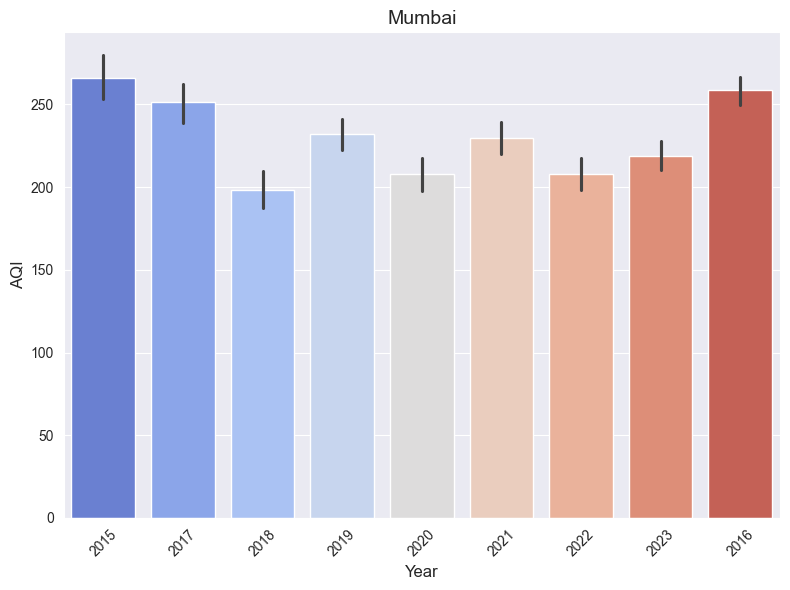

In [55]:
copy_df['city'][copy_df['AQI_calculated'] >= 500].value_counts()
copy_df['Year'] = copy_df['date'].dt.year.astype(str)
cols = ["Ghaziabad", "Bengaluru", "Patna", "Delhi", "Lucknow", "Mumbai"]
for col in cols:
    plt.figure(figsize=(8, 6))  
    plt.title(col, fontsize=14)  
    x = copy_df[copy_df['city'] == col]
    sns.barplot(x='Year', y='AQI_calculated', data=x, palette='coolwarm')  
    plt.xlabel('Year', fontsize=12)  
    plt.ylabel('AQI', fontsize=12)  
    plt.xticks(rotation=45)  
    plt.tight_layout()  
    plt.show()

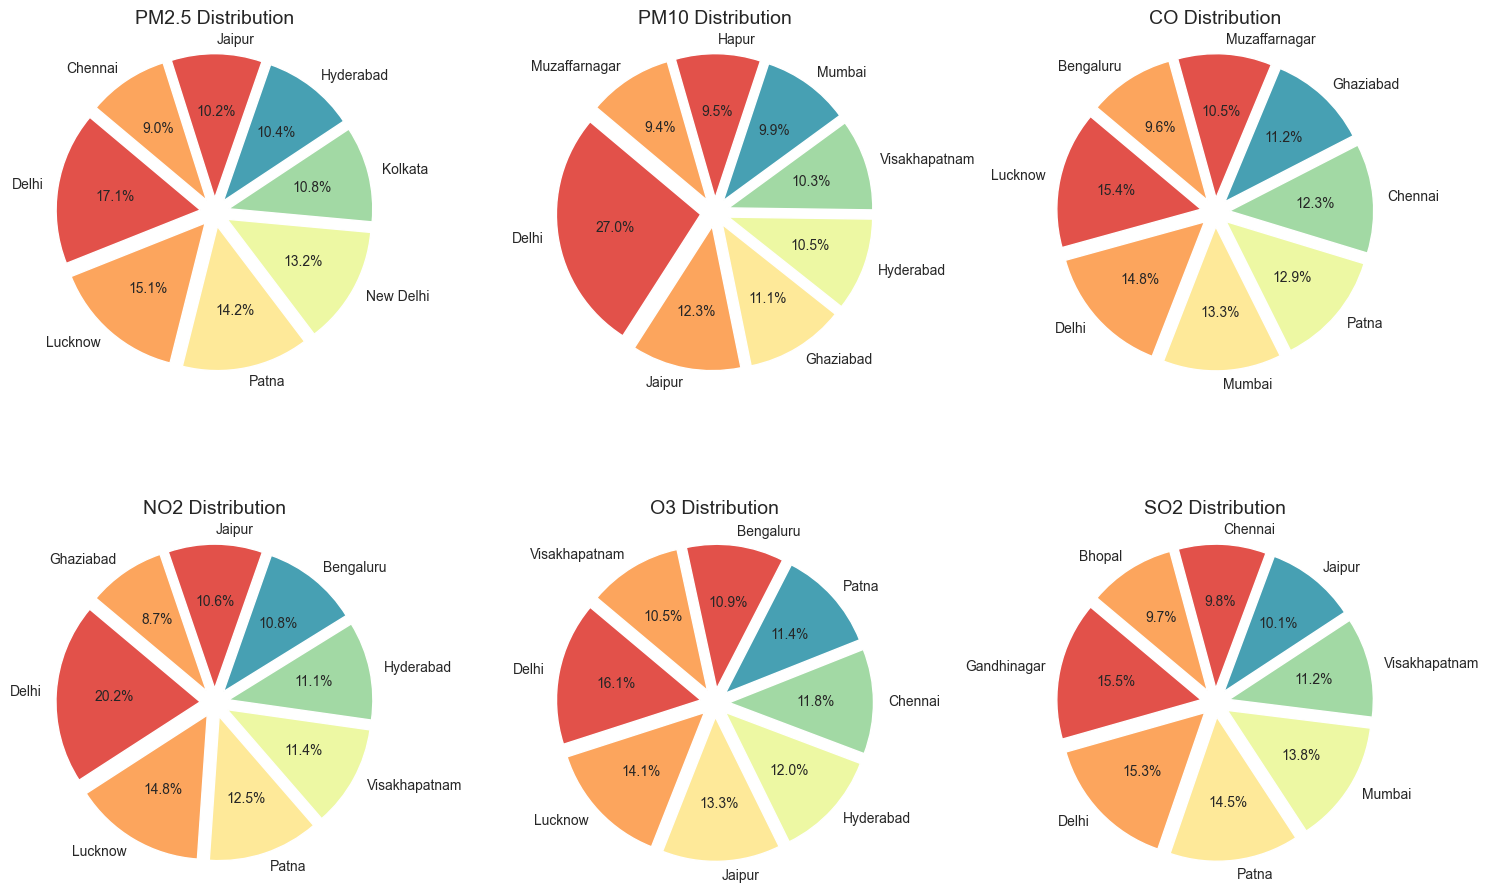

In [51]:
cols = ['PM2.5', 'PM10', 'CO', 'NO2', 'O3', 'SO2']

# Generate colors using Seaborn's color_palette
colors = sns.color_palette('Spectral', len(cols))

# Define explode values for each slice
explode = [0.1] * len(cols)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each pollutant
for i, col in enumerate(cols):
    # Group data by city and sum up the pollutant values, then sort in descending order
    x = copy_df.groupby('city')[col].sum().sort_values(ascending=False)[:8]
    
    # Adjust explode list to match the length of x
    explode = [0.1] * len(x)
    
    # Plot pie chart using Seaborn's countplot function
    axes[i].pie(x, labels=x.index, autopct='%1.1f%%', startangle=140, colors=colors[:len(x)], explode=explode)
    
    # Set plot title
    axes[i].set_title(f'{col} Distribution', fontsize=14)
    
# Adjust layout
plt.tight_layout()
plt.show()

## 5.6 Effect of Lockdown on AQI

In [60]:
# AQI for some of the major cities of India
cities = ["Ghaziabad", "Bengaluru", "Patna", "Delhi", "Lucknow", "Mumbai"]

filtered_city_day = new_df[new_df['date'] >= '2018-01-01']
AQI = filtered_city_day[filtered_city_day.city.isin(cities)][['date','city','AQI_calculated','AQI_bucket_calculated']]
AQI.head()

,date,city,AQI_calculated,AQI_bucket_calculated
26,2018-01-01,Bengaluru,217.0,Poor
28,2018-01-01,Delhi,471.0,Severe
33,2018-01-01,Lucknow,368.0,Very Poor
34,2018-01-01,Mumbai,335.0,Very Poor
38,2018-01-01,Patna,339.0,Very Poor


In [61]:
AQI_pivot = AQI.pivot(index='date', columns='city', values='AQI_calculated')
AQI_pivot.fillna(method='bfill',inplace=True)


from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=6, cols=1,
    
    subplot_titles=("Ghaziabad", "Bengaluru", "Patna", "Delhi", "Lucknow", "Mumbai"))

fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Ghaziabad'],
                    marker=dict(color=AQI_pivot['Ghaziabad'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Bengaluru'],
                    marker=dict(color=AQI_pivot['Bengaluru'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Patna'],
                    marker=dict(color=AQI_pivot['Patna'], coloraxis="coloraxis")),
              3, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Delhi'],
                    marker=dict(color=AQI_pivot['Delhi'], coloraxis="coloraxis")),
              4, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Lucknow'],
                    marker=dict(color=AQI_pivot['Lucknow'], coloraxis="coloraxis")),
              5, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Mumbai'],
                    marker=dict(color=AQI_pivot['Mumbai'], coloraxis="coloraxis")),
              6, 1)

fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="AQI Levels")

fig.update_layout(plot_bgcolor='white')

fig.update_layout( width=800,height=1200,shapes=[
      dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25', x1= '2020-03-25'
    )
])

fig.show()

## 5.7 correlation analysis


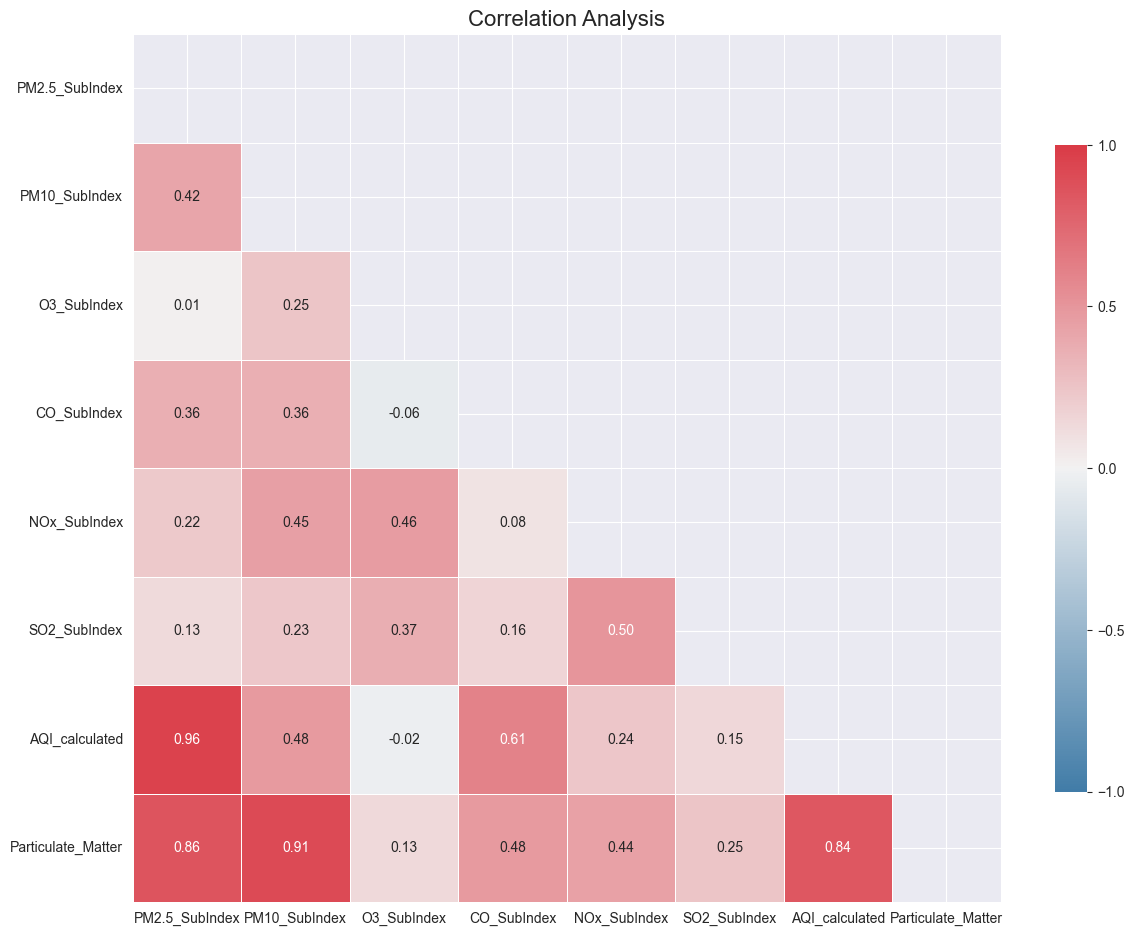

In [73]:
plt.figure(figsize=(14, 12))

# Assuming `new_df` is your DataFrame
copy_df = new_df.select_dtypes(include='float64')
copy_df = copy_df.iloc[ : , 11:]
# Calculate correlation matrix
correlation_matrix = copy_df.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Define custom color palette
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            vmin=-1,
            linewidths=.5,
            cbar_kws={"shrink": 0.7, "ticks": [-1, -0.5, 0, 0.5, 1]},
            square=True)

# Add title
plt.title('Correlation Analysis', fontsize=16)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Show plot
plt.show()